# World population age

In [1]:
%matplotlib inline

import sys
if sys.version_info < (3,):
    from urllib import urlopen, urlencode
else:
    from urllib.request import urlopen
    from urllib.parse import urlencode
import contextlib

import pandas as pd
from pandas.core import nanops
nanops._USE_BOTTLENECK = False  # workaround nansum overflow in bottleneck

URL = 'https://www.census.gov/population/international/data/idb/worldpop.php'
POST = {'popYears': 2014, 'submit': 'Submit'}

with contextlib.closing(urlopen(URL, urlencode(POST).encode('utf-8'))) as fd:
    df, = pd.read_html(fd, encoding='ascii', skiprows=[1], attrs={'class': 'query_table'})

df['Age'] = df['Age'].replace('100 +', '100').astype(int)
df = df.set_index('Age')
assert df.index.is_unique

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 4 columns):
Both Sexes Population    101 non-null int64
Male Population          101 non-null int64
Female Population        101 non-null int64
Sex Ratio                101 non-null float64
dtypes: float64(1), int64(3)
memory usage: 8.9 KB


## Total

In [2]:
total = df['Both Sexes Population'].sum()
total

7167884394

## Distribution

,Both Sexes Population,Male Population,Female Population,Sex Ratio
Age,,,,
0,130606786,67504122,63102664,107.0
1,128612105,66477964,62134141,107.0
2,127332645,65855853,61476792,107.1
3,126197655,65300691,60896964,107.2
4,125289342,64843066,60446276,107.3
5,124615091,64507712,60107379,107.3
6,123926722,64168297,59758425,107.4
7,122740201,63561334,59178867,107.4
8,121528294,62935949,58592345,107.4


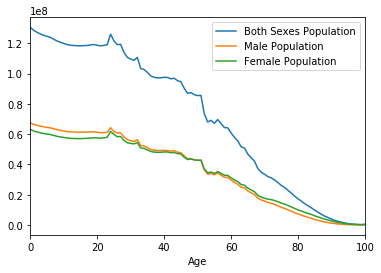

In [3]:
df[['Both Sexes Population', 'Male Population', 'Female Population']].plot()
df.head(30)

## Mode (top 10)

In [4]:
df.sort_values('Both Sexes Population', ascending=False).head(10)

,Both Sexes Population,Male Population,Female Population,Sex Ratio
Age,,,,
0,130606786,67504122,63102664,107.0
1,128612105,66477964,62134141,107.0
2,127332645,65855853,61476792,107.1
3,126197655,65300691,60896964,107.2
24,126042228,64246401,61795827,104.0
4,125289342,64843066,60446276,107.3
5,124615091,64507712,60107379,107.3
6,123926722,64168297,59758425,107.4
7,122740201,63561334,59178867,107.4


## Mean

In [5]:
(df.index.values * df['Both Sexes Population']).sum() / float(total)

31.817568511554875

## Median

In [6]:
df[df['Both Sexes Population'].cumsum() >= total / 2][:1]

,Both Sexes Population,Male Population,Female Population,Sex Ratio
Age,,,,
29,110746033,56393095,54352938,103.8
